This shows an example of using cooltools.insulation to obtain boundaries for the bonev_2017 data (HiC_ES.mm10.mapq_30.1000.mcool). 

Since this data is sequenced more deeply & is also for ESC, it may be more reliable than obtaining boundaries from NIPBL-FKBP-untreated_RSHIC13-21_merge_220502.1000.mcool. 

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cooler
import cooltools
from cooltools.lib.plotting import *
import bioframe

In [ ]:
#load cooler
resolution = 10_000
bonev_cooler_file = '/project/fudenber_735/GEO/bonev_2017_GSE96107/distiller-0.3.1_mm10/results/coolers/HiC_ES.mm10.mapq_30.1000.mcool'
bonev_cooler = cooler.Cooler(bonev_cooler_file+'::resolutions/'+str(resolution))
clr = bonev_cooler


In [27]:
feature_dir = '/'.join(bonev_cooler_file.split('/')[:-1])+'/features/'
# optionally re-calculate insulation table
recalculate_insulation_table = False
if recalculate_insulation_table:
    ins = cooltools.insulation(bonev_cooler,  200_000) 
    ins.to_csv(feature_dir+'/bonev2017.HiC_ES.mm10.mapq_30.1000.window_200000.insulation',
               na_rep='NA', 
               sep='\t', 
               index=False)

/tmp/SLURM_8487990/ipykernel_53959/4015885023.py:17: RuntimeWarning: divide by zero encountered in log10
  im = plt.matshow(np.log10(mat),


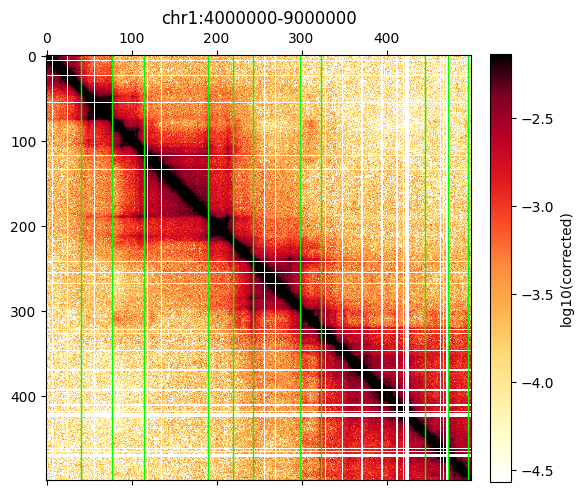

In [60]:
# load boundaries
insulation_table = pd.read_table(feature_dir+'/bonev2017.HiC_ES.mm10.mapq_30.1000.window_200000.insulation')
insulation_boundaries = insulation_table.query('is_boundary_200000 == True')

# plot a region with reasonable defaults for colormap
region = 'chr1:4000000-9000000'
region_chrom, region_start, region_end = bioframe.parse_region_string(region)

plt.figure(figsize=(6,6))
mat = clr.matrix(balance=True).fetch(region)
im = plt.matshow(np.log10(mat), 
                 vmax = np.log10(np.nanmedian(np.diag(mat,2)))-.5,
                 fignum=False ,cmap='fall' ); 
plt.colorbar(im ,fraction=0.046, pad=0.04, label='log10(corrected)')

# draw green lines at the position of boundaries
region_boundaries = bioframe.select(insulation_boundaries, region).copy()
region_boundaries['pos']  = ((region_boundaries['start'].values-region_start)//10000)
for i in range(len(region_boundaries)):
    s = region_boundaries['pos'].values[i]
    plt.plot(  [s,s],[0+1,len(mat)-1],'-', lw=1, color=[0,.99,.0], mfc='none')

plt.title(region);